<a href="https://colab.research.google.com/github/hrushik98/VITS-COQUI-TTS/blob/dev/VITS_COQUI_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

follow me on github: @hrushik98

Clone my forked TTS repo and install the requirements

In [ ]:
!git clone https://github.com/hrushik98/VITS-COQUI-TTS.git
%cd /content/VITS-COQUI-TTS/
! pip install -e .

Cloning into 'VITS-COQUI-TTS'...
remote: Enumerating objects: 26719, done.
remote: Counting objects: 100% (609/609), done.
remote: Compressing objects: 100% (281/281), done.
remote: Total 26719 (delta 377), reused 451 (delta 314), pack-reused 26110
Receiving objects: 100% (26719/26719), 129.36 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (19271/19271), done.
/content/VITS-COQUI-TTS
Obtaining file:///content/VITS-COQUI-TTS
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for TTS (pyproject.toml) ... done
  Created wheel for TTS: filename=TTS-0.15.6-0.editable-cp310-cp310-linux_x86_64.whl size=9893 sha256=292bd370ad3eae65a4ad8ae3158dcdaff49580aba6d7089a9ae193d021126981
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nd6bq1u/wheels/e9/5f/20/1b1f56a8477633d5f07d1d0b4a31d3bfcb77da7d6c7f3837f5
Successfully bui

Setting an output path

In [ ]:
import os

# BaseDatasetConfig: defines name, formatter and path of the dataset.
from TTS.tts.configs.shared_configs import BaseDatasetConfig

output_path = "/content/MyTTSdata"
if not os.path.exists(output_path):
    os.makedirs(output_path)

For preparing metadata.csv
- You can use your own logic to do this or if you want to do it the way I did, Upload the audio files into MyTTSdata/wavs
- upload all the transcripts of the audio files into a folder called as texts (create it first in "/content")
- run this below cell to generate a metadata.csv file in /content
- drag and drop the metadata.csv file into /content/MyTTSdata

- Now your MyTTSdata folder should have these files:
- sub-folder named as "wavs" with the .wavs of all the audios
- a "metadata.csv" file

It should look something like this

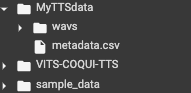

/content


In [ ]:
# uncomment this if you want to use this code
# %cd /content

# import os
# import csv

# texts = os.listdir("/content/texts")

# for i in range(0, len(texts)):
#     with open(f"/content/texts/{texts[i]}", "r") as f:
#         text = f.read()
#         print(text)

#         with open("metadata.csv", "a") as f:
#             datai = csv.writer(f)
#             col1 = f"{texts[i][:-4]}|{text}|{text}"
#             datai.writerow([col1])

In [ ]:
dataset_config = BaseDatasetConfig(
    formatter="ljspeech", meta_file_train="/content/MyTTSdata/metadata.csv", path=os.path.join(output_path, "/content/MyTTSdata/")
)

In [ ]:
from TTS.tts.models.vits import Vits, VitsArgs, VitsAudioConfig, CharactersConfig
from TTS.tts.configs.vits_config import VitsConfig
from TTS.tts.models.vits import Vits

setting audio config and training config file

In [ ]:
audio_config = VitsAudioConfig(
    sample_rate=22050, win_length=1024, hop_length=256, num_mels=80, mel_fmin=0, mel_fmax=None
)
config = VitsConfig(
    batch_size=32,
    eval_batch_size=16,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=-1,
    epochs=2,
    text_cleaner="phoneme_cleaners",
    use_phonemes=True,
    phoneme_language="en-us",
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    print_step=25,
    print_eval=False,
    mixed_precision=True,
    output_path=output_path,
    datasets=[dataset_config],
)

In [ ]:
from TTS.utils.audio import AudioProcessor
ap = AudioProcessor.init_from_config(config)
ap.sample_rate = 22050



 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


In [ ]:
from TTS.tts.utils.text.tokenizer import TTSTokenizer
tokenizer, config = TTSTokenizer.init_from_config(config)

In [ ]:
#never set the eval_split to false

#use this if you have less number of audio files that cannot be split into eval_split

from TTS.tts.datasets import load_tts_samples
train_samples, eval_samples = load_tts_samples(
    dataset_config,
    eval_split=True,
    eval_split_size = 0.08333333333333333,
)


 | > Found 20 files in /content/MyTTSdata


In [ ]:
#use this if you have a bigger dataset and can split into eval batch

# from TTS.tts.datasets import load_tts_samples
# train_samples, eval_samples = load_tts_samples(
#     dataset_config,
#     eval_split=True,
#     eval_split_max_size=config.eval_split_max_size,
#     eval_split_size=config.eval_split_size,

# )

In [ ]:
model = Vits(config, ap, tokenizer, speaker_manager=None)

In [ ]:
from trainer import Trainer, TrainerArgs
trainer = Trainer(
    TrainerArgs(), config, output_path, model=model, train_samples=train_samples, eval_samples=eval_samples
)

 > Training Environment:
 | > Current device: 0
 | > Num. of GPUs: 1
 | > Num. of CPUs: 2
 | > Num. of Torch Threads: 1
 | > Torch seed: 54321
 | > Torch CUDNN: True
 | > Torch CUDNN deterministic: False
 | > Torch CUDNN benchmark: False
 > Start Tensorboard: tensorboard --logdir=/content/MyTTSdata/run-July-15-2023_01+17PM-0000000

 > Model has 83059180 parameters


In [ ]:
trainer.fit()


 > EPOCH: 0/2
 --> /content/MyTTSdata/run-July-15-2023_01+17PM-0000000
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

 > TRAINING (2023-07-15 13:17:22) 




> DataLoader initialization
| > Tokenizer:
	| > add_blank: True
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: en-us
		| > phoneme backend: gruut
| > Number of instances : 19
 | > Preprocessing samples
 | > Max text length: 39
 | > Min text length: 12
 | > Avg text length: 28.0
 | 
 | > Max audio length: 56838.0
 | > Min audio length: 30150.0
 | > Avg audio length: 42873.36842105263
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.


/usr/local/lib/python3.10/dist-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]

   --> STEP: 0/1 -- GLOBAL_STEP: 0
     | > loss_disc: 6.021332740783691  (6.021332740783691)
     | > loss_disc_real_0: 1.0415648221969604  (1.0415648221969604)
     | > loss_disc_real_1: 1.0164521932601929  (1.0164521932601929)
     | > loss_disc_real_2: 0.9977254867553711  (0.9977254867553711)
     | > loss_disc_real_3: 1.0030697584152222  (1.0030697584152222)
     | > loss_disc_real_4: 1.005555272102356  (1.005555272102356)
     | > loss_disc_real_5: 0.9559569954872131  (0.9559



> DataLoader initialization
| > Tokenizer:
	| > add_blank: True
	| > use_eos_bos: False
	| > use_phonemes: True
	| > phonemizer:
		| > phoneme language: en-us
		| > phoneme backend: gruut
| > Number of instances : 1
 | > Preprocessing samples
 | > Max text length: 24
 | > Min text length: 24
 | > Avg text length: 24.0
 | 
 | > Max audio length: 39414.0
 | > Min audio length: 39414.0
 | > Avg audio length: 39414.0
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.22967004776000977 (+0)
     | > avg_loss_disc: 6.021605491638184 (+0)
     | > avg_loss_disc_real_0: 1.041588306427002 (+0)
     | > avg_loss_disc_real_1: 1.0164965391159058 (+0)
     | > avg_loss_disc_real_2: 0.9975182414054871 (+0)
     | > avg_loss_disc_real_3: 1.0033607482910156 (+0)
     | > avg_loss_disc_real_4: 1.0055900812149048 (+0)
     | > avg_loss_disc_real_5: 0.9560434818267822 (+0)
     | > avg_loss_0: 6.021605491638184 (+0)
     | > avg_loss_gen: 6.020498275756836 (+0)
     | > avg_loss_kl: 159.24618530273438 (+0)
     | > avg_loss_feat: 0.2969387471675873 (+0)
     | > avg_loss_mel: 103.61222839355469 (+0)
     | > avg_loss_duration: 2.220001459121704 (+0)
     | > avg_loss_1: 271.3958435058594 (+0)



 | > Synthesizing test sentences.


/content/VITS-COQUI-TTS/TTS/tts/models/vits.py:1455: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  test_figures["{}-alignment".format(idx)] = plot_alignment(alignment.T, output_fig=False)

  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.22967004776000977 (+0.0)
     | > avg_loss_disc: 6.021605491638184 (+0.0)
     | > avg_loss_disc_real_0: 1.041588306427002 (+0.0)
     | > avg_loss_disc_real_1: 1.0164965391159058 (+0.0)
     | > avg_loss_disc_real_2: 0.9975182414054871 (+0.0)
     | > avg_loss_disc_real_3: 1.0033607482910156 (+0.0)
     | > avg_loss_disc_real_4: 1.0055900812149048 (+0.0)
     | > avg_loss_disc_real_5: 0.9560434818267822 (+0.0)
     | > avg_loss_0: 6.0216

 | > Synthesizing test sentences.



  --> EVAL PERFORMANCE
     | > avg_loader_time: 0.33202481269836426 (+0.0)
     | > avg_loss_disc: 6.021486282348633 (+0.0)
     | > avg_loss_disc_real_0: 1.0415163040161133 (+0.0)
     | > avg_loss_disc_real_1: 1.0166192054748535 (+0.0)
     | > avg_loss_disc_real_2: 0.9974833130836487 (+0.0)
     | > avg_loss_disc_real_3: 1.003432273864746 (+0.0)
     | > avg_loss_disc_real_4: 1.0053625106811523 (+0.0)
     | > avg_loss_disc_real_5: 0.9560642242431641 (+0.0)
     | > avg_loss_0: 6.021486282348633 (+0.0)
     | > avg_loss_gen: 6.020497798919678 (+0.0)
     | > avg_loss_kl: 162.7445068359375 (+0.0)
     | > avg_loss_feat: 0.1434541493654251 (+0.0)
     | > avg_loss_mel: 78.226806640625 (+0.0)
     | > avg_loss_duration: 2.0377585887908936 (+0.0)
     | > avg_loss_1: 249.1730194091797 (+0.0)

 > BEST MODEL : /content/MyTTSdata/run-July-15-2023_01+17PM-0000000/best_model_2.pth
